# Optimization

Given a function $f(\mathbf{x})$, where $\mathbf{x}=(x_1,x_2,...x_n)$, a length
$n$ vector, find the maxima or minima of the function.  Depending on the
problem, this extrema may be ''local''  or ''global'' . Given infinite
time and resources, this is not a hard problem, we just evaluate
$f(\mathbf{x})$ everywhere. Sadly, infinite time and resources just doesn't
happen, and we are stuck in the usual computational
pickle, do it with

* minimum time,
* minimum memory,
* and minimum expense.

In most practical cases these three objectives might be reduced to one;
optimize with a minimal number of evaluations of $f(\mathbf{x})$.

For clarity, we will discuss minimization, knowing that minimization is just
the negative of a maximization problem, $-f(\mathbf{x})$.  Both are examples of
optimization. Also note that minimization is ''not''  the same as root
finding. Root finding is a much more difficult problem because the general form
has many independent variables to evaluate; i.e. one must find the independent
zeros of all the outputs. Minimization is finding the minima of a single
variable.

This is a well researched problem, with many possible forms of attack. To date,
optimization remains a very active area of research, both in computation and
numerics. At an introductory level, it will be appropriate to introduce you to
one common strategy in some depth, and then provide a description of a few
other popular methods.

The idea of an optimal solution to a problem can be misleading. In the words of
a well regarded author on the subject of optimization:

*They are the first refuge of the computational scoundrel, and one feels that
the world would be a better place if they were quietly abandoned.*

--S. Forman Acton (1990) "Numerical Recipes that Work"

## Simplex Method

### Overview
Here is a method that is remarkably simple, robust, and because of its geometrical nature, delightful to learn. It is hands down the biggest payoff for the least amount of code, involves only function evaluations (no derivatives), and is a great place to begin most any optimization problem.

These attractive features, and that it is part of `SciPy`, lead us to consider the method in greater depth than the others. Not to give you the wrong idea though. Simplex methods are by no means the optimal optimization method. They are comparatively slow, and often poorly suited for global optimization.

The method is attributed to Nelder and Mead (1965).


### Important Concepts

Begin by defining a simplex:

 **The simplex is the geometrical figure consisting, in $N$ dimensions, 
 of $N+1$ points (vertices) and all interconnecting line segments,  polygonal faces, etc.**

Said another way, a simplex has one more vertex than dimension.

In 2 dimensions, this is a triangle, in 3, a tetrahedron.

There are simplexes in linear programming, but otherwise the simplex  method is unrelated.  

![Simple figure of some low dimensional simplices, a triangle in 2D and  a tetrahedron in 3D.](./images/Simplices.png)

### The Algorithm
Use the simplex to guide minimization with the following algorithm.      

* Pick a starting point $\mathbf{x}_1$.      
 
![Ordering of the vertices and computing the mean.](images/Ordering.png)

* Define a set of linearly independent points to define the initial simplex;  
$$\mathbf{x}_i=\mathbf{x}_1 + \lambda \hat{\mathbf{n}}_i$$
where $\lambda$ is how big the original simplex should be, and the $\hat { \mathbf{n}}_i$ are basis vectors for the space you are working in.  

* Evaluate each point of the simplex in terms of the function  $f(\mathbf{x})$.

* Re-order the vertices from worst ($\mathbf{x}_1$, maximum) to best  ($\mathbf{x}_{D+1}$, minimum), where $D$ is the dimension of the problem  according to the results of the function $f(\mathbf{x}_i)$. This gives:  $(\mathbf{x}_1,\mathbf{x}_2,...,\mathbf{x}_{D+1})$.  

* Find the mean of the vertices, excluding the worst one.  

$$  \mathbf{x}_{mean} = \frac{1}{D} \sum_{i=2}^{D+1} \mathbf{x}_i  $$  

* "Shoot" the bad vertex in the direction of lower values. Or, "reflect"  it across 
the point $\mathbf{x}_{mean}$.    

$$\begin{matrix}  \mathbf{x}_1^{new(b)}&=& \mathbf{x}_{mean} + (\mathbf{x}_{mean}-\mathbf{x}_1)\\  &=&2\mathbf{x}_{mean} - \mathbf{x_1}  \end{matrix}$$    

![The reflection operation moves the worst vertex across the mean of the  better vertices. The '''xnew(b)''' indicates that this is the $x_1^{new(b)}$  computed in algorithm step ''(b)'' .}](images/Reflect.png)

#### After Reflection
* Test if $f(\mathbf{x_1^{new(b)}}) < f(\mathbf{x}_{D+1})$, (remember  $f(x_{D+1}$) was the ''best''  point), if it is, a good  move was made. Be greedy, and go for more! Reflect and grow; what an upbeat but somehow objectivist message!  

$$\begin{matrix}  \mathbf{x}_1^{new(c)}&=& \mathbf{x}_{mean} + 2(\mathbf{x}_{mean}-\mathbf{x}_1)\\  &=&3\mathbf{x}_{mean} - 2 \mathbf{x_1}  \end{matrix}$$    

* If $f(\mathbf{x}_1^{new(c)}) < f(\mathbf{x}_{D+1})$ things are great, keep it, and move on to improve  $\mathbf{x}_2$ (previously the second worst point). We don't want to get too  greedy, otherwise the simplex gets too skinny.

* If $f(\mathbf{x}_1^{new(c)}) > f(\mathbf{x}_{D+1})$, you have overshot the  minimum, and you should retreat back to the first move, and then move on to  improve $\mathbf{x}_2$.    

![The reflect and grow operation.](images/ReflectandGrow.png)

* If the original shot resulted in 

$f(\mathbf{x}_1^{new(b)}) >  f(\mathbf{x}_{2})$ (still the worst), try making the shot shorter with a  reflect and shrink operation. This makes the  simplex smaller.  

$$\begin{matrix}  \mathbf{x}_1^{new(d)}&=& \mathbf{x}_{mean} + \frac{1}{2}(\mathbf{x}_{mean}-\mathbf{x}_1)\\  &=&\frac{3}{2}\mathbf{x}_{mean} - \frac{1}{2} \mathbf{x_1}  \end{matrix}$$
  
* If $f(\mathbf{x_1^{new(d)}}) < f(\mathbf{x}_{2})$ accept the change, and  move on to $\mathbf{x}_2$.    

![The reflect and shrink operation.](images/ReflectandShrink.png)

### Demo
The following is a demonstration of the simplex algorithm. The midpoints of the simplices have been plotted in white.

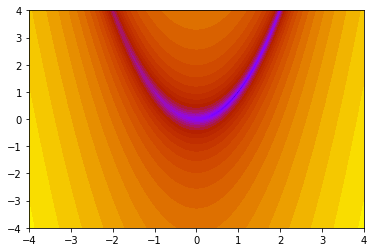

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize,rosen
%matplotlib inline

x0 = np.array([-1.3, -1.7])
x_m = np.linspace(-4,4,200)
x,y = np.meshgrid(x_m,x_m)


x_list = []
y_list = []

def store_location(x):
    x_list.append(x[0])
    y_list.append(x[1])
"""
res = minimize(rosen, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True},\
               callback = store_location)
"""

plt.contourf(x,y,np.log(rosen([x,y])),cmap='gnuplot',levels=30)
#plt.plot(x0[0],x0[1],'ro',x_list,y_list,'wo',res.x[0],res.x[1],'go',markersize=.5)
#plt.show()

## Powell's Method

I'd like to look at a second optimization method called Powell's method. This is another oldie, but a goodie. 

Before discussing Powell's method, we need to spend a little time considering another piece of technology; the line search. Suppose you or only interested in finding the minimum along a line. Turns out this golden-section search operation is slow but robust and a great entry point to solving the problem. I'll explain this from the following diagram. It comes down to this $f_{4a}$ and $f_{4b}$, they dictate where the search goes next. The left three are taken for $f_{4a}$ because it is larger than $f_2$. The right three are recursed into for $f_{4b}$ because the it is smaller than $f_2$

![The Golden Search method.](images/GoldenSectionSearch.png "Golden Search")

That provides some insight into line search, so now let us suppose that we have an outstanding means of finding the minimum along a line. How do we take this one-dimensional wizardry and generalize to $N$ dimensions?

The first thought you might have is to search each of the independent directions sequentially, beginning from the previous axes minimum. Let's sketch that on the board. What's the problem with this?

The solution is one that is common to many optimization methods - *conjugate directions*. The following diagram sketches that out, and is taken from the [video linked](https://www.youtube.com/watch?v=1Z_4sBNoZj4&ab_channel=EMPossible).

![Powell's method](images/Powell.png)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 304


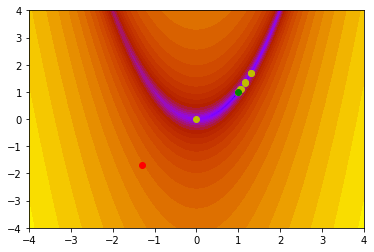

In [2]:
x_list = []
y_list = []

def store_location(x):
    x_list.append(x[0])
    y_list.append(x[1])

res = minimize(rosen, x0, method='Powell',
               options={'disp': True},\
               callback = store_location)

plt.contourf(x,y,np.log(rosen([x,y])),cmap='gnuplot',levels=30)
plt.plot(x0[0],x0[1],'ro',x_list,y_list,'yo',res.x[0],res.x[1],'go')
plt.show()


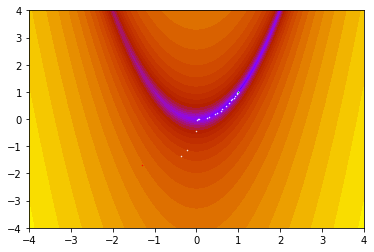

In [3]:
x_list = []
y_list = []

def store_location(x):
    x_list.append(x[0])
    y_list.append(x[1])

res = minimize(rosen, x0, method='L-BFGS-B',
               options={'disp': True},\
               callback = store_location)

plt.contourf(x,y,np.log(rosen([x,y])),cmap='gnuplot',levels=30)
plt.plot(x0[0],x0[1],'ro',x_list,y_list,'wo',res.x[0],res.x[1],'go',markersize=.5)
plt.show()


10.0 percent complete
Acceptance rate = 0.155
20.0 percent complete
Acceptance rate = 0.141
30.0 percent complete
Acceptance rate = 0.133
40.0 percent complete
Acceptance rate = 0.132
50.0 percent complete
Acceptance rate = 0.132
60.0 percent complete
Acceptance rate = 0.128
70.0 percent complete
Acceptance rate = 0.127
80.0 percent complete
Acceptance rate = 0.122
90.0 percent complete
Acceptance rate = 0.120
100.0 percent complete
Acceptance rate = 0.120


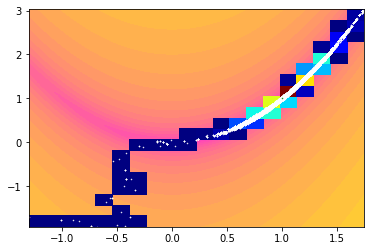

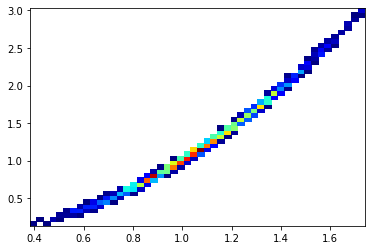

In [6]:
from scipy.interpolate import interp1d
from scipy.stats import norm

step = .1
x_list = []
y_list = []
v_list = []
sigma = .01

def loglikelihood(x,x_prop):
    y_prop = rosen(x_prop)
    y      = rosen(x)
    return np.sign(y-y_prop)*(y - y_prop)**2/sigma

def proposal(x):
    return norm(x,step).rvs()

def mcmc_step(x):
    x_prop = proposal(x)
    w = np.log(np.random.rand())
    accept = 0
    test = min(0,loglikelihood(x,x_prop))
    if  w < test:
        x = x_prop.copy()
        accept = 1
        v_list.append(rosen(x))
    x_list.append(x[0])
    y_list.append(x[1])
    return x,accept

def run(x, N):
    accept_ = 0
    for i in range(1,N+1):
        if (i % (N//10)) == 0:
            print("%3.1f percent complete"%float(i/N*100))
            print("Acceptance rate = %4.3f"%(accept_/i))
        x, accept = mcmc_step(x)
        accept_ += accept

run(x0,25000)

plt.contourf(x,y,np.log(rosen([x,y])),cmap='spring',levels=30)
plt.plot(x0[0],x0[1],'ro',x_list,y_list,'wo',res.x[0],res.x[1],'go',markersize=.5)
plt.hist2d(x_list,y_list,cmin=1,bins=(20,20),cmap='jet');
plt.show()
plt.hist2d(x_list[500:],y_list[500:],bins=(50,50),cmin=1,cmap='jet');

In [7]:
# Double check the proposal distribution:
x_list=[]
y_list=[]
for i in range(5000):
    x = proposal(x0)
    x_list.append(x[0])
    y_list.append(x[1])


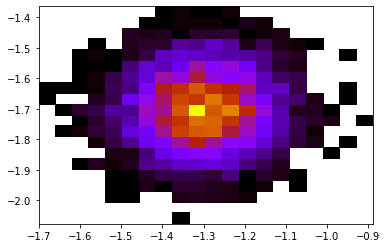

In [8]:
plt.hist2d(x_list,y_list,cmin=1,bins=(20,20),cmap='gnuplot');


### Objective for the week

The week's objective will be to write another method for your SEIR class. This one might be called `get_optimal_parameters()` where initial values of those parameters could be class data, or passed to the function.

The essential responsibility of this function is to return a complete set of parameters that come back from the optimization machinery. It will do so by minimization of the `get_SSE` method that you wrote last week.

Keep track of the time required to perform the complete optimization. This should allow you to estimate how long your computer will be busy to perform this task for all administrative units (states and districts) you have data for.

Take a three staged approach:
1. Do the optimization with Nelder-Mead.
2. Do the optimization with Powell.
3. Do the optimization with Powell and then Nelder-Mead, using the output of the former for the initial guess of the later.

Keep tract of the SSE at the end of each and determine the best strategy for reducing SSE.

Once you are satisfied with your results from optimization, move on to loop over all states. Make sure to record the optimial parameters in a saved ata structure. Pandas is a good way to go.

***This will not be turned in until after next week!***

Next week - conclude with uncertainty quantification and visualization.